## Linear Regression
Linear regression is a supervised learning algorithm that is used to predict continuous values such as house prices. The algorithm is given some training data from which it creates a model (hypothesis) that it will use to predict house prices. 

### Single Variable
In  univariate linear regression we have one feature variable `x` like the size of the house in square meters. The algorithm will create a hypothesis `h`. This hypothesis will be used to map inputs (size of house) to outputs (price) -- predicting the price of the house. Below is the equation of the hypothesis for univariate linear regression:
![](img/hypothesis-single.PNG)

The hypothesis is an equation that will give us a line that best fits our data so we can make sensible predictions.

#### Cost Function 
So how do we select `theta_0` and `theta_1` in the equation above? We choose `theta_0` and `theta_1` so that our hypothesis `h(x)` is as close as possible to `y` for all examples `(x, y)` in our dataset. This means the error between the predicted value and the actual value needs to be as small as possible. Below is the formular for calculating this error:
![](img/squared-error.PNG)
Our goal is to minimise our cost function `J` and in doing so our hypothesis will give us a line that best fits our data.

#### Gradient Descent
This is an algorithm that is used to minimise the cost function. It does so by iteratively updating our `theta`'s in proportion to the negative gradient of the function at the current point as indicated below, for `j = 0 and j=1`:
![](img/gradient-descent-general.PNG)
`alpha` is the learning rate that determines the size of the step we take. If `alpha` is too small we will take too long to reach the local minimum and if it's too large we might overshoot the local minimum.

In our univariate linear regression problem the partial derivatives for `J` with respect to `theta_0` and `theta_1` are as follows:
![](img/partial-derivatives.PNG)
So we will update `theta_0` and `theta_1` as follows:
![](img/gradient-descent-linear-reg.PNG)

### Multiple Variables
We have seen how to solve a univariate linear regression problem but how do we go about it when we have multiple features with `n` being the total number of features? Now our hypothesis will look like this:
![](img/hypothesis-multivariate.PNG)
For convinience let `x_0 = 1` and then we put our features `x_0 to x_n` in a vector and same applies to our parameters `theta_0 to theta_n`:
![](img/vectors.PNG)
Now our hypothesis can be simplified as follows:
![](img/hypothesis-multrix.PNG)
We then iteratively update our parameters using the following, until we converge to a local minimum:
![](img/gradient-descent-multivariate.PNG)

## Example
Let's see how all this work.

In [124]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [125]:
# load data
df = pd.read_csv('home.txt', names=['size', 'bedroom', 'price'])
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


The data we have loaded show the size of a house, number of bedrooms and its price.

In [126]:
# normalize our features
df = (df - df.mean()) / df.std()
df.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [127]:
# Let's now create matrices and set hyperparameters
y = df['price'].values
X = df.drop(['price'], axis=1)

ones = np.ones([X.shape[0], 1]) # vector of ones
X = np.concatenate((ones, X), axis=1 )
num_examples, num_features = np.shape(X)
theta = np.zeros(num_features)
num_iterations = 1000

In [128]:
# Cost function
def compute_cost(X, y, theta)
    diffs = np.dot(X, theta.T) - y
    cost = np.sum(diffs ** 2) / (2 * num_examples)
    return cost

In [120]:
def gradient_descent(X, y, theta, num_iterations, alpha=0.01):
    cost = np.zeros(num_iterations)
    for i in range(num_iterations):
        # difference between hypothesis and actual values
        diffs = np.dot(X, theta.T) - y
        # gradient for every example
        gradient = np.dot(X.T, diffs) / num_examples
        # update parameters
        theta = theta - alpha * gradient
        cost[i] = compute_cost(X, y, theta)
    return theta, cost
        
    

In [121]:
theta, cost = gradient_descent(X, y, theta, num_iterations)

Text(0,0.5,'Cost')

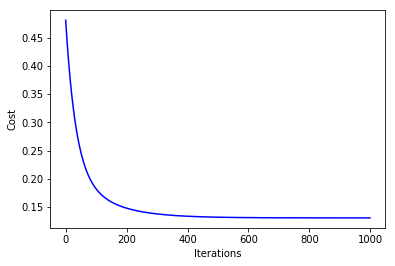

In [123]:
fig, ax = plt.subplots()
ax.plot(np.arange(num_iterations), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

As you can see our cost is decreasing with time. 

Let's see how a different learning rate will affect how fast our cost function changes over time

Text(0,0.5,'Cost')

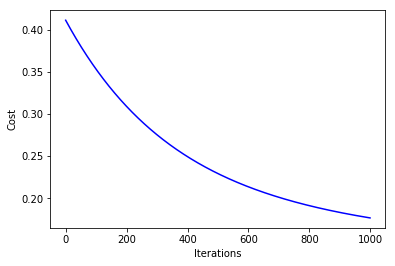

In [130]:
# smaller alpha
theta, cost = gradient_descent(X, y, theta, num_iterations,0.001)
fig, ax = plt.subplots()
ax.plot(np.arange(num_iterations), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

As you can see our cost functions takes longer to converge

Text(0,0.5,'Cost')

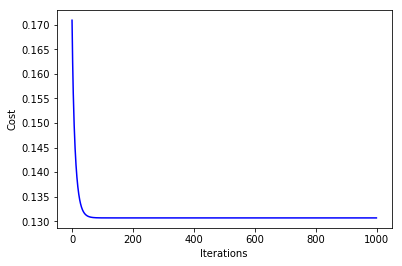

In [131]:
# larger alpha
theta, cost = gradient_descent(X, y, theta, num_iterations,0.1)
fig, ax = plt.subplots()
ax.plot(np.arange(num_iterations), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

With a larger cost function we converge faster.